In [2]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [3]:
cols = ['ID', 'diagnosis', "mean_radius",
    "mean_texture",
    "mean_perimeter",
    "mean_area",
    "mean_smoothness",
    "mean_compactness",
    "mean_concavity",
    "mean_concave_points",
    "mean_symmetry",
    "mean_fractal_dimension",
    "radius_se",
    "texture_se",
    "perimeter_se",
    "area_se",
    "smoothness_se",
    "compactness_se",
    "concavity_se",
    "concave_points_se",
    "symmetry_se",
    "fractal_dimension_se",
    "worst_radius",
    "worst_texture",
    "worst_perimeter",
    "worst_area",
    "worst_smoothness",
    "worst_compactness",
    "worst_concavity",
    "worst_concave_points",
    "worst_symmetry",
    "worst_fractal_dimension"]
df = pd.read_csv('wdbc_data.csv', names= cols)
df.head()

,ID,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
pd.unique(df['diagnosis'])

array(['M', 'B'], dtype=object)

In [5]:
df['diagnosis'] = (df['diagnosis'] == "M").astype(int)

In [6]:
pd.unique(df['diagnosis'])

array([1, 0])

In [7]:
x = df.drop(["ID", "diagnosis"], axis= 1)
y = df['diagnosis']

In [8]:
for i in x.columns:
    x[i] = (x[i] - min(x[i])) / (max(x[i] - min(x[i])))

In [9]:
ros = RandomOverSampler()
x, y = ros.fit_resample(x, y)

In [10]:
x.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,...,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.370622,0.338207,0.365880,0.245131,0.406975,0.285604,0.242373,0.282170,0.394608,0.268046,...,0.331473,0.381524,0.316959,0.197871,0.421354,0.244842,0.247457,0.441993,0.277966,0.199694
std,0.176309,0.143766,0.177378,0.161189,0.127271,0.168812,0.198851,0.203916,0.140193,0.148324,...,0.182117,0.164937,0.176531,0.151858,0.152281,0.164340,0.175011,0.233542,0.129381,0.124551
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.239907,0.240869,0.235022,0.128335,0.315970,0.153326,0.083130,0.115147,0.292298,0.158488,...,0.192458,0.264725,0.180624,0.088773,0.317837,0.127616,0.110663,0.253462,0.194658,0.113276
50%,0.329831,0.331924,0.324822,0.193425,0.403539,0.261702,0.197634,0.252063,0.380051,0.245893,...,0.286909,0.372868,0.276109,0.145067,0.423496,0.206033,0.221126,0.419072,0.257146,0.169585
75%,0.495480,0.416977,0.486559,0.341230,0.487226,0.380406,0.357193,0.424491,0.470076,0.345830,...,0.449039,0.490738,0.428258,0.272574,0.517269,0.330292,0.337720,0.625430,0.328060,0.258494
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [13]:
tree_objects = []
accuracies = []
acc = 0
depth = [5, 10, 15, 20]
sample_split = [5, 10, 15, 20]

for i in depth:
    for j in sample_split:
        dt_model = DecisionTreeClassifier(
                max_depth=i,
                min_samples_split=j,
                criterion='gini'
            )
        
        dt_model.fit(x_train, y_train)
        y_pred = dt_model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)

        tree_objects.append(dt_model)
        accuracies.append(acc)



In [17]:
best_acc, idx = round(max(accuracies)*100, 2), accuracies.index(max(accuracies))

In [20]:
best_acc

94.41

In [18]:
# Save the best tree separately
'''best_idx = np.argmax(accuracies)
best_tree = tree_objects[best_idx]
joblib.dump(best_tree, 'best_decision_tree.pkl')'''

"best_idx = np.argmax(accuracies)\nbest_tree = tree_objects[best_idx]\njoblib.dump(best_tree, 'best_decision_tree.pkl')"

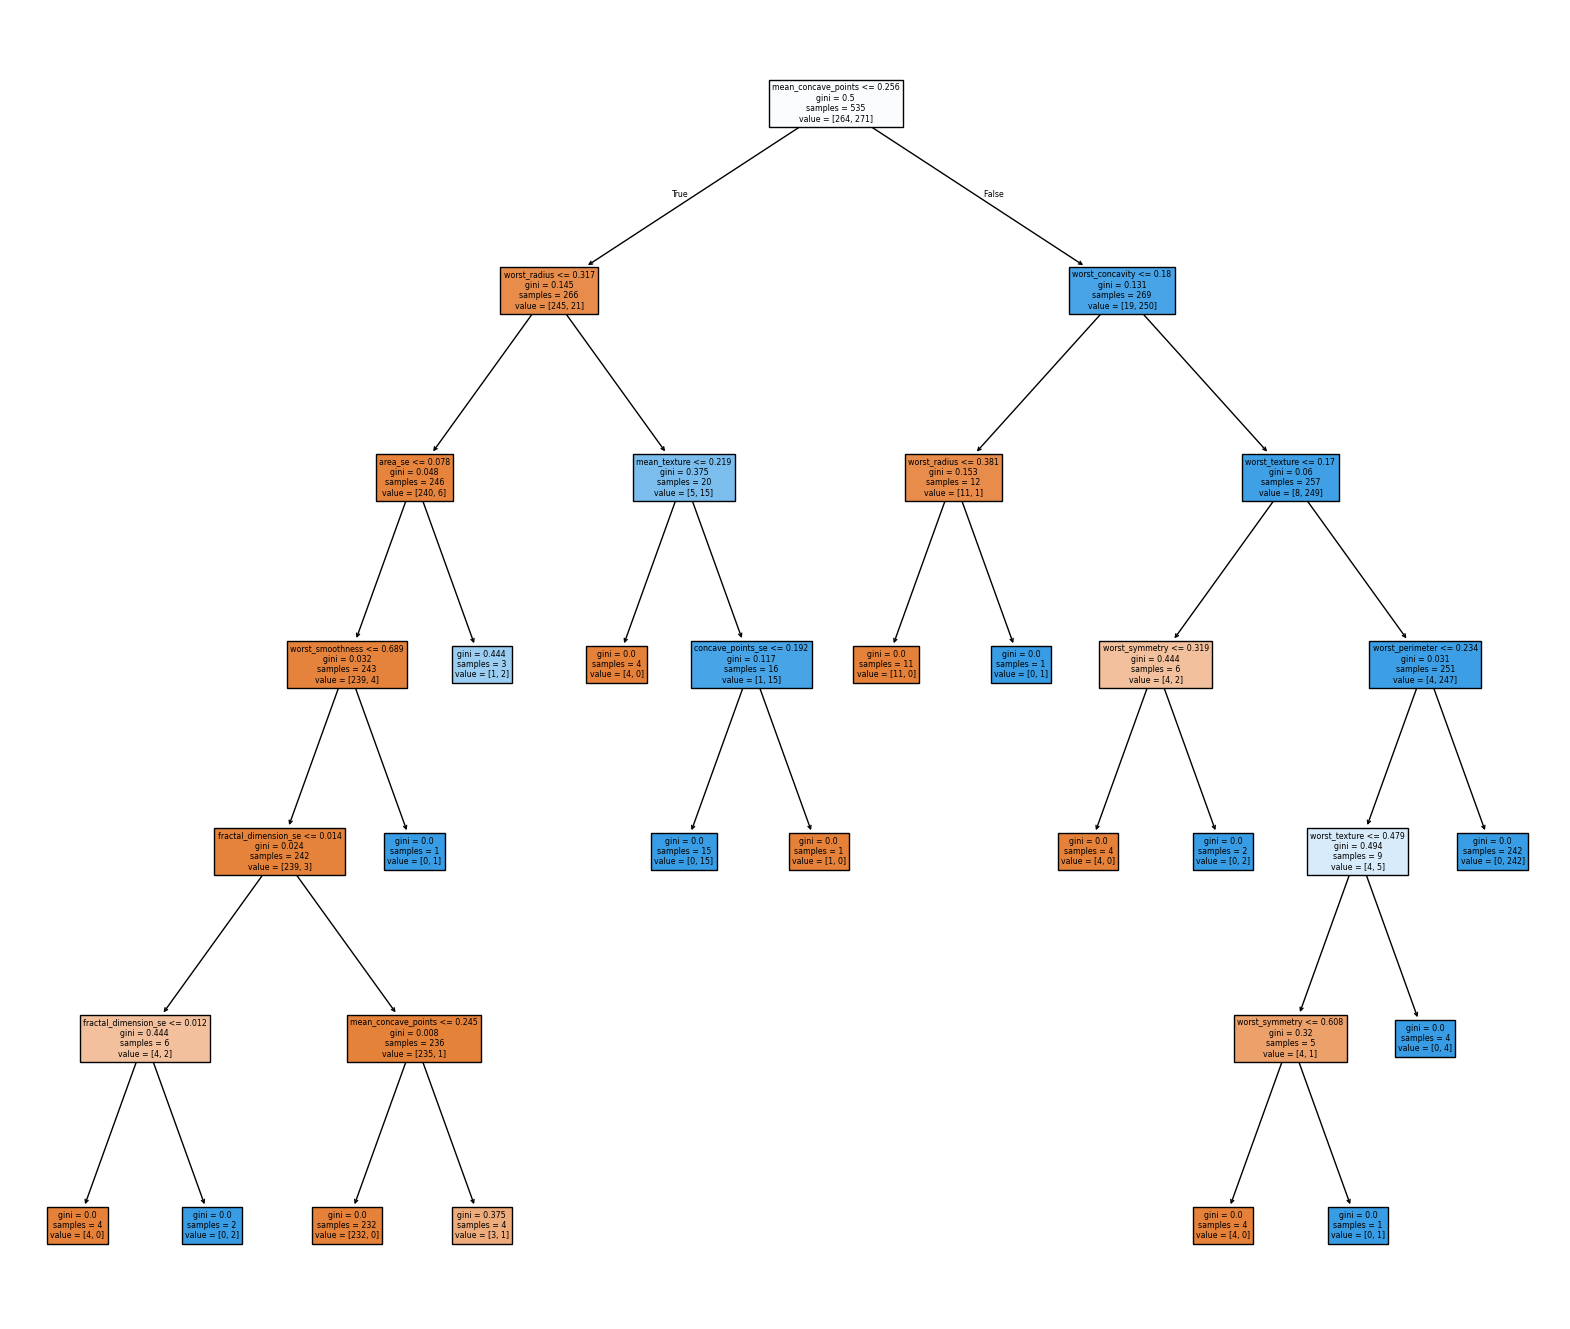

In [19]:
# Visualize the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_name = [ "mean_radius",
    "mean_texture",
    "mean_perimeter",
    "mean_area",
    "mean_smoothness",
    "mean_compactness",
    "mean_concavity",
    "mean_concave_points",
    "mean_symmetry",
    "mean_fractal_dimension",
    "radius_se",
    "texture_se",
    "perimeter_se",
    "area_se",
    "smoothness_se",
    "compactness_se",
    "concavity_se",
    "concave_points_se",
    "symmetry_se",
    "fractal_dimension_se",
    "worst_radius",
    "worst_texture",
    "worst_perimeter",
    "worst_area",
    "worst_smoothness",
    "worst_compactness",
    "worst_concavity",
    "worst_concave_points",
    "worst_symmetry",
    "worst_fractal_dimension"]
plt.figure(figsize=(20, 17))
plot_tree(tree_objects[idx], filled=True, feature_names= feature_name)
plt.show()